## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
# Combine the data into a single dataset
# Use the pd.merge function to merge the two data set, using the 'Mouse ID' which is common to both data as key and keeping every row in the left data frame *mouse_data*
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice in the DataFrame.
# Go into the combined_data, find the length of rows under the 'Mouse ID' column and store the result as 'Num_of_mice'

Num_of_mice = (combined_data["Mouse ID"]).nunique()

Num_of_mice

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = combined_data[combined_data[["Mouse ID", "Timepoint"]].duplicated() == True]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
# Go to the 'combined_data', find duplicates based on 'Mouse ID' and store result in a variable called 'duplicate_mice_id'

duplicate_mice_id = combined_data["Mouse ID"]=="g989"
duplicate_mice_id

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Name: Mouse ID, Length: 1893, dtype: bool

In [7]:
combined_data.loc[duplicate_mice_id]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_combined_data = combined_data.loc[~duplicate_mice_id]
cleaned_combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
Num_of_mice_cleaned_data = (cleaned_combined_data["Mouse ID"]).nunique()

Num_of_mice_cleaned_data

248

In [10]:
mice_cleaned_data = cleaned_combined_data.drop_duplicates("Mouse ID").reset_index()
mice_cleaned_data

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.0,0
1,10,s185,Capomulin,Female,3,17,0,45.0,0
2,20,x401,Capomulin,Female,16,15,0,45.0,0
3,30,m601,Capomulin,Male,22,17,0,45.0,0
4,40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...,...
243,1858,z314,Stelasyn,Female,21,28,0,45.0,0
244,1860,z435,Propriva,Female,12,26,0,45.0,0
245,1863,z581,Infubinol,Female,24,25,0,45.0,0
246,1873,z795,Naftisol,Female,13,29,0,45.0,0


## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end.
cleaned_data_mean = cleaned_combined_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"] # same as, cleaned_combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

In [12]:
cleaned_data_median = cleaned_combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

In [13]:
cleaned_data_variance = cleaned_combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

In [14]:
cleaned_data_stdv = cleaned_combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

In [15]:
cleaned_data_SEM = cleaned_combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

In [16]:
Summary_stats_df = pd.DataFrame({"Mean" : cleaned_data_mean,
                                "Median" : cleaned_data_median,
                                "Variance" : cleaned_data_variance,
                                "Standard Deviation" : cleaned_data_stdv,
                                "SEM" :cleaned_data_SEM})

In [17]:
Summary_stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.

# Use the agg() method to do multiple operations over specified axes.
Groupby_summary_stats = cleaned_combined_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})

In [19]:
Groupby_summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

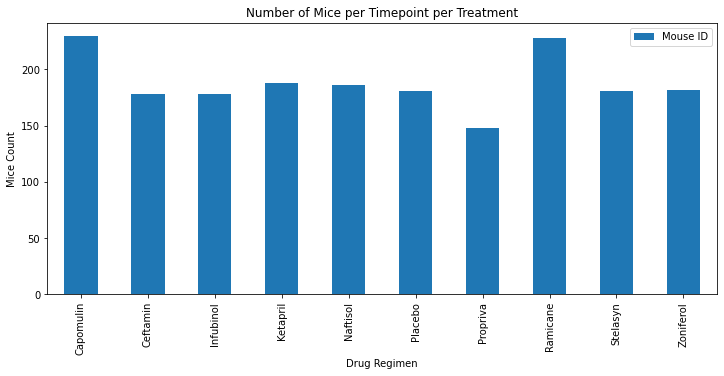

In [20]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

treatment_data = pd.DataFrame(cleaned_combined_data.groupby(["Drug Regimen"]).count()).reset_index()

treatment_df = treatment_data[["Drug Regimen", "Mouse ID"]].set_index("Drug Regimen")

treatment_df.plot(kind="bar", figsize=(12,5))

plt.title("Number of Mice per Timepoint per Treatment")
plt.ylabel("Mice Count")
plt.show()

In [21]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

# Create an array as a list of mice ages by drug regimen
Drug_regimen_counts = (cleaned_combined_data.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
Drug_regimen_counts

[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

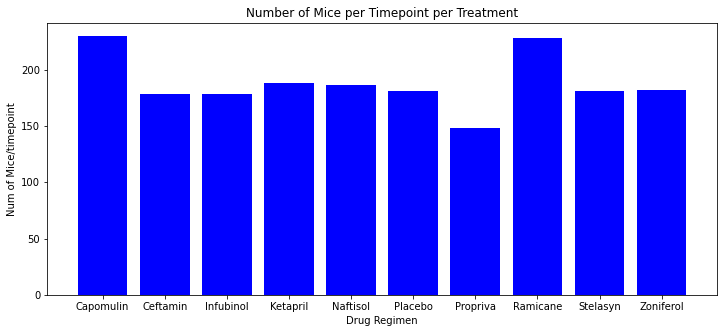

In [22]:
# Create various drug regimen as a list
drug_regimen_list = Summary_stats_df.index.tolist()
# Set the x_axis to be the length of the Drug_regimen_counts
x_axis = np.arange(len(Drug_regimen_counts))
x_axis = drug_regimen_list
y_axis = Drug_regimen_counts
plt.figure(figsize=(12,5))
plt.bar(x_axis, y_axis, color="b", align="center")


# Set x-axis and y-axis labels
plt.title("Number of Mice per Timepoint per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Num of Mice/timepoint")
plt.show()

## Pie Plots

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_stats = pd.DataFrame(cleaned_combined_data.groupby(["Sex"]).count()).reset_index()
gender_stats

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,922,922,922,922,922,922,922
1,Male,958,958,958,958,958,958,958


In [24]:
# Generate a dataframe for gender and mouse ID with counts of each gender

gender_df = gender_stats[["Sex","Mouse ID"]]
gender_df

,Sex,Mouse ID
0,Female,922
1,Male,958


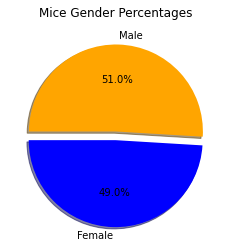

In [25]:
gender_counts = cleaned_combined_data.groupby(["Sex"]).count()["Mouse ID"]
plt.pie(gender_counts,
        labels=["Female", "Male"],
        explode=[0.1,0],
        colors=["blue", "orange"],
        autopct='%1.1f%%',
        shadow=True,
        startangle=180)
plt.title("Mice Gender Percentages")
plt.show()

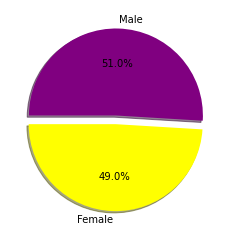

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create labels for each section of the pie chart
labels= ["Female", "Male"]
colors = ["yellow", "purple"]
explode = (0.1,0)

# Create a count of each gender as a list
gender_counts_list = (cleaned_combined_data.groupby(["Sex"])["Age_months"].count()).tolist()
gender_counts_list

plt.pie(gender_counts_list,
       explode=explode,
        labels=labels,
        colors=colors,
        autopct="%1.1f%%",
        shadow=True,
        startangle=180)
plt.show()

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# To determine the top 4 regimen, first calculate the average tumor volume for each drug regimen and sort values.
# the final timepoint from cleaned_combined_data is 45

tumor_vol_df = cleaned_combined_data.loc[cleaned_combined_data["Timepoint"] == 45]
tumor_vol_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [28]:
# Obtain the average tumor volume per drug regimen at timepoint 45 and sort values to get the top drug regimen


top_regimen = cleaned_combined_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean().reset_index().sort_values(by="Tumor Volume (mm3)", ascending=True).reset_index(drop=True)
# four most promising treatment regimens
top_regimen.head(4)

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,40.216745
1,Capomulin,40.675741
2,Propriva,52.320930
3,Ceftamin,52.591172


In [29]:
# Extract summary data for top 4 regimens
top_regimen_summary_df = cleaned_combined_data[cleaned_combined_data["Drug Regimen"].isin(["Ramicane", "Capomulin", "Propriva", "Ceftamin"])].sort_values(["Timepoint"], ascending=True)
top_regimen_summary_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
338,w150,Capomulin,Male,23,23,0,45.000000,0
341,v923,Capomulin,Female,19,21,0,45.000000,0
351,g316,Capomulin,Female,22,22,0,45.000000,0
361,s710,Capomulin,Female,1,23,0,45.000000,0
...,...,...,...,...,...,...,...,...
154,c758,Ramicane,Male,9,17,45,33.397653,1
1670,w151,Ceftamin,Male,24,25,45,67.527482,3
1162,l733,Ceftamin,Female,4,30,45,64.299830,1
1693,w350,Propriva,Male,7,26,45,64.957562,2


In [30]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.

# Summary stats for drug regimen Ramicane
Ramicane_df = cleaned_combined_data[cleaned_combined_data["Drug Regimen"].isin(["Ramicane"])].sort_values(["Timepoint"], ascending=True)
# Ramicane_df.describe()

In [31]:
# Summary stats for drug regimen Capomulin
Capomulin_df = cleaned_combined_data[cleaned_combined_data["Drug Regimen"].isin(["Capomulin"])].sort_values(["Timepoint"], ascending=True)
# Capomulin_df.describe()

In [32]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

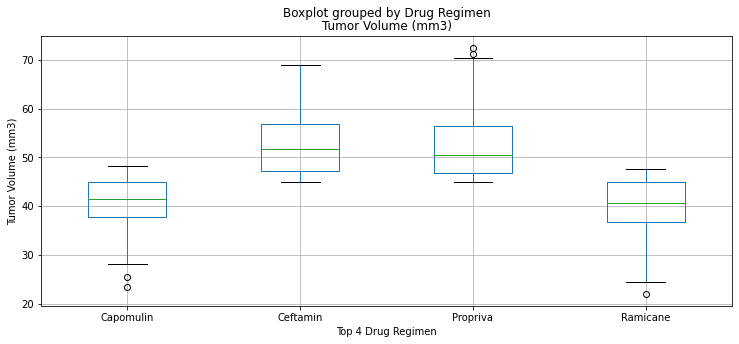

In [33]:
top_regimen_summary_df.boxplot(column="Tumor Volume (mm3)", by="Drug Regimen", figsize=(12,5))
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Top 4 Drug Regimen")
plt.show()

In [34]:
# quantitatively determine if there are any potential outliers.

In [35]:
# access data for Ramicane with Total Volume
Ramicane_red_df = Ramicane_df["Tumor Volume (mm3)"]
# Ramicane_red_df

In [36]:
# Obtain quartiles for drug regimen Ramicane
quantiles_rami = Ramicane_red_df.quantile([.25, 0.5, 0.75]).reset_index()
quantiles_rami

,index,Tumor Volume (mm3)
0,0.25,36.674635
1,0.50,40.673236
2,0.75,45.000000


In [37]:
# Obtain quartiles for top 4 drug regimen

top_regimen_group_df = top_regimen_summary_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
# top_regimen_group_df

In [38]:
quantiles = top_regimen_group_df.quantile([.25, 0.5, 0.75])
# quantiles

In [39]:
# Create a data frame for the quantiles and store in a variable called quantiles_df
quantiles_df = pd.DataFrame(quantiles)
quantiles_df

Tumor Volume (mm3)
Drug Regimen                         
Capomulin    0.25           37.685933
             0.50           41.557809
             0.75           45.000000
Ceftamin     0.25           47.208427
             0.50           51.776157
             0.75           56.801438
Propriva     0.25           46.894328
             0.50           50.446266
             0.75           56.491585
Ramicane     0.25           36.674635
             0.50           40.673236
             0.75           45.000000

In [55]:
lower_q = quantiles_df.loc[pd.IndexSlice[:,0.25],:]
lower_q.index = lower_q.index.droplevel(1)
lower_q

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,37.685933
Ceftamin,47.208427
Propriva,46.894328
Ramicane,36.674635


In [54]:
upper_q = quantiles_df.loc[pd.IndexSlice[:,0.75],:]
upper_q.index = upper_q.index.droplevel(1)
upper_q

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,45.000000
Ceftamin,56.801438
Propriva,56.491585
Ramicane,45.000000


In [56]:
iqr_top4_regimen = upper_q.subtract(lower_q)
iqr_top4_regimen

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,7.314067
Ceftamin,9.593010
Propriva,9.597257
Ramicane,8.325365


In [57]:
outliers_lower_bound = lower_q.subtract(iqr_top4_regimen*1.5)
outliers_lower_bound

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,26.714832
Ceftamin,32.818911
Propriva,32.498443
Ramicane,24.186586


In [58]:
outliers_upper_bound = upper_q.add(iqr_top4_regimen*1.5)
outliers_upper_bound

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,55.971101
Ceftamin,71.190953
Propriva,70.887471
Ramicane,57.488048


## Line and Scatter Plots

In [259]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
timep_tumorV = cleaned_combined_data.loc[cleaned_combined_data["Drug Regimen"] == "Capomulin"]
timep_tumorV

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [363]:
# Create a data frame for Mouse ID, m601 and store as timep_tumorV
timep_tumorV_df = cleaned_combined_data.loc[cleaned_combined_data["Mouse ID"] == "m601"]
timep_tumorV_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
30,m601,Capomulin,Male,22,17,0,45.000000,0
31,m601,Capomulin,Male,22,17,5,41.408591,1
32,m601,Capomulin,Male,22,17,10,36.825367,1
33,m601,Capomulin,Male,22,17,15,35.464612,1
34,m601,Capomulin,Male,22,17,20,34.255732,1
35,m601,Capomulin,Male,22,17,25,33.118756,1
36,m601,Capomulin,Male,22,17,30,31.758275,1
37,m601,Capomulin,Male,22,17,35,30.834357,1
38,m601,Capomulin,Male,22,17,40,31.378045,1
39,m601,Capomulin,Male,22,17,45,28.430964,1


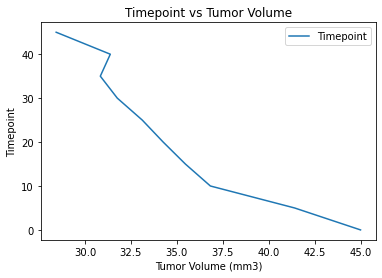

In [380]:
timep_tumorV_df.plot(x="Tumor Volume (mm3)", y="Timepoint")
plt.ylabel("Timepoint")
plt.title("Timepoint vs Tumor Volume")
plt.show()

In [218]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
top_regimen_summary_df.loc[top_regimen_summary_df["Timepoint"]==0]["Tumor Volume (mm3)"].nunique

1

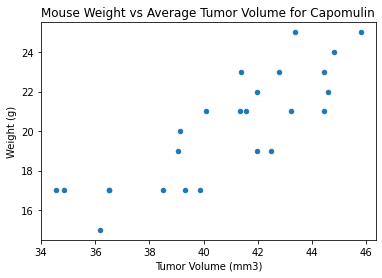

In [283]:
weight_per_ave_vol = top_regimen_summary_df.loc[top_regimen_summary_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").mean()
H.plot(y="Weight (g)", x="Tumor Volume (mm3)", kind="scatter")
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin")
plt.show()

## Correlation and Regression

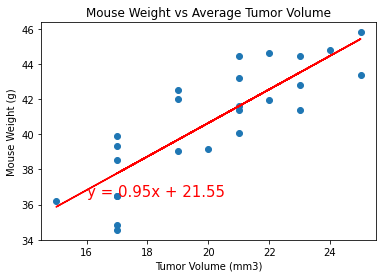

In [376]:
# Calculate the correlation coefficient and linear regression model 
from scipy.stats import linregress
mouse_weight = H.loc[:,"Weight (g)"] 
mouse_volume = H.loc[:,"Tumor Volume (mm3)"]
correlation = st.pearsonr(mouse_volume,mouse_weight)

correlation
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = mouse_weight
y_values = mouse_volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,36.5),fontsize=15,color="red")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)")
plt.title("Mouse Weight vs Average Tumor Volume")
plt.show()

## Analysis


In [365]:
top_regimen.head(4)

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,40.216745
1,Capomulin,40.675741
2,Propriva,52.320930
3,Ceftamin,52.591172


Table 1. Top 4 Drug Regimen with Average Tumor Volume of mice

In [366]:
Ramicane_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,228.000000,228.000000,228.000000,228.000000,228.000000
mean,10.684211,19.679825,21.425439,40.216745,0.548246
std,5.946629,3.235014,14.275720,4.846308,0.691259
min,1.000000,16.000000,0.000000,22.050126,0.000000
25%,7.000000,17.000000,10.000000,36.674635,0.000000
50%,9.000000,19.000000,20.000000,40.673236,0.000000
75%,18.000000,22.000000,35.000000,45.000000,1.000000
max,23.000000,25.000000,45.000000,47.622816,3.000000


Table 2. Summary Statistics for Mice Treated with Ramicane

In [373]:
Capomulin_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,230.000000,230.000000,230.000000,230.000000,230.000000
mean,13.456522,19.965217,21.565217,40.675741,0.713043
std,7.721423,2.732404,14.384994,4.994774,0.848993
min,1.000000,15.000000,0.000000,23.343598,0.000000
25%,7.000000,17.000000,10.000000,37.685933,0.000000
50%,16.500000,20.500000,20.000000,41.557809,0.000000
75%,20.000000,22.000000,35.000000,45.000000,1.000000
max,24.000000,25.000000,45.000000,48.158209,3.000000


Table 3. Summary Statistics for Mice Treated with Capomulin

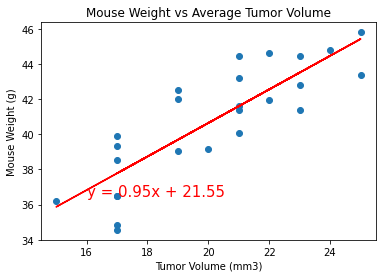

Chart of Mouse Weight vs Tumor Volume

At the end of the experiment at time point 45, Ramicane and Capomulin, from the summary statistics are the two drug regimen with the best results with respect to tumor volume. 
The mice with lowest average tumor volume (mm3) shows the efficacy level of the drug regimen. Mice treated with Ramicane showed the lowest tumor volume at the end of the experiment.

The relative standard deviation (with mean) with respect to Tumor Volume for mice treated with Ramicane and Capomulin are 12.05% and 12.28% respectively. This show that the measurement of data for mice treated with Ramicane is more precise than with Capomulin. 
consequently, notwithstanding a regression line for weight vs tumor volume that shows a somewhat direct relation, the relative standard deviation negates the impact of mouse weight in this study, for the two drug regimen.
A better comparison would have been equal numbers of mice with same weights at the beginning of the experiment, that were treated with Ramicane or Capomulin and analysing tumor volumes at timepoint 45. 